<a href="https://colab.research.google.com/github/hifistelija/Logistic_Regression/blob/main/Logistic_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [ ]:
df = pd.read_csv("hearing_test.csv")

# Exploratory Data Analysis and Visualization

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [ ]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

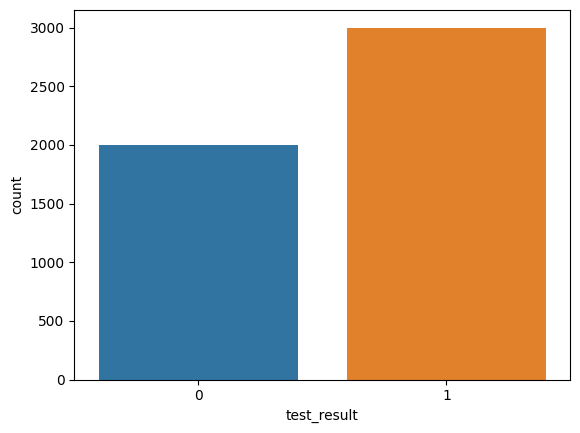

In [ ]:
sns.countplot(data=df, x="test_result")

<Axes: xlabel='test_result', ylabel='age'>

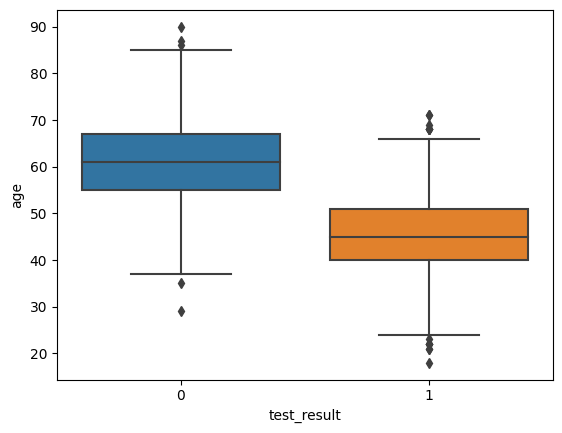

In [ ]:
sns.boxplot(x="test_result", y="age", data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

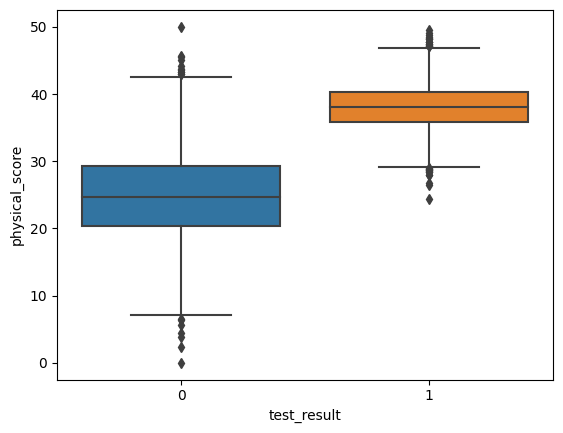

In [ ]:
sns.boxplot(x="test_result", y="physical_score", data=df)

<Axes: xlabel='age', ylabel='physical_score'>

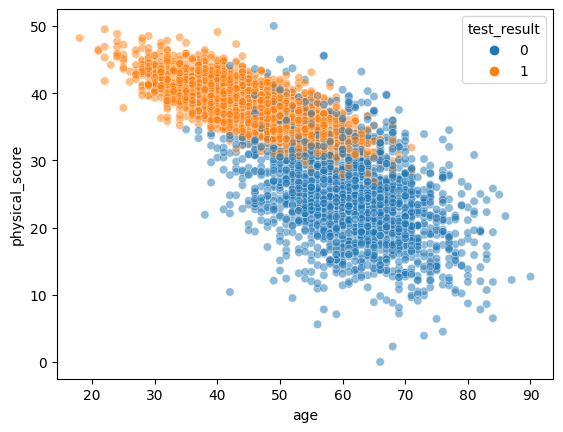

In [ ]:
sns.scatterplot(x="age", y="physical_score", data=df, hue="test_result", alpha=0.5)

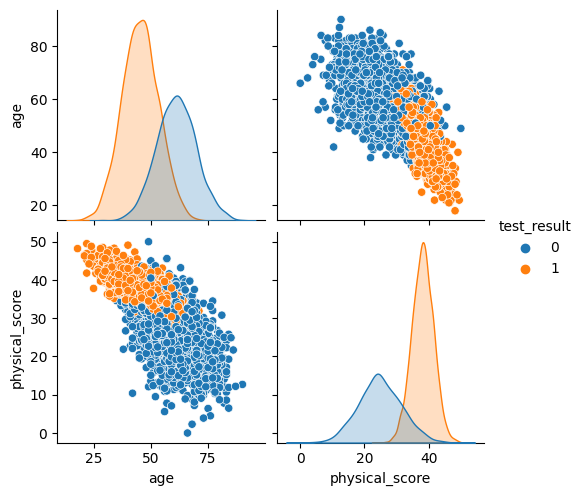

In [ ]:
sns.pairplot(df, hue="test_result")

<Axes: >

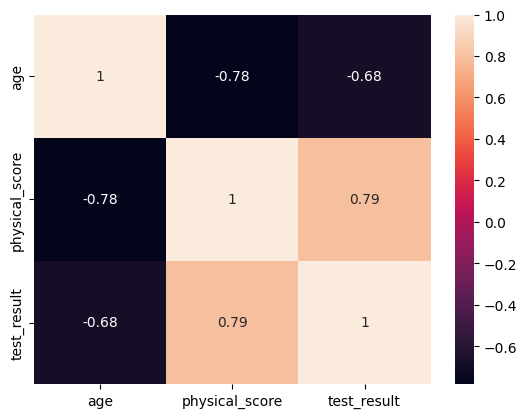

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

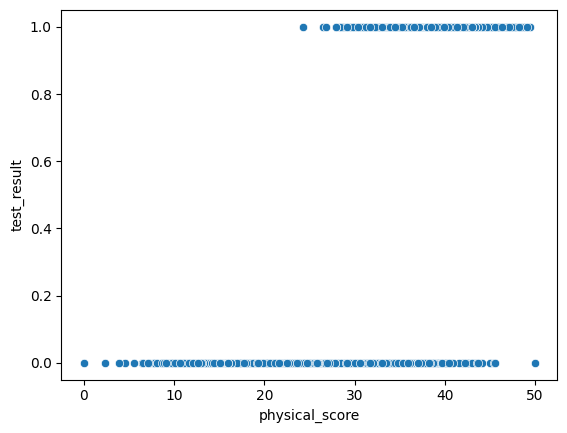

In [ ]:
sns.scatterplot(x="physical_score", y="test_result", data=df)

<Axes: xlabel='age', ylabel='test_result'>

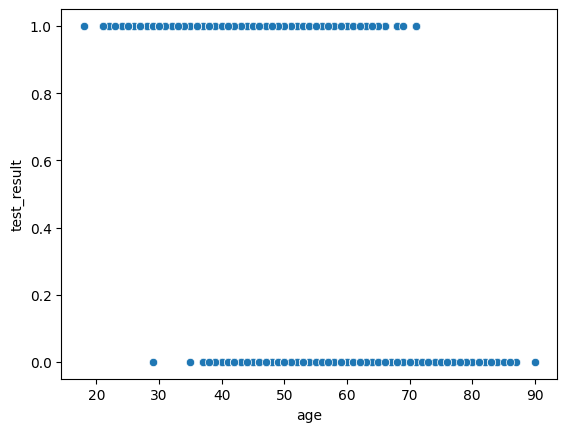

In [ ]:
sns.scatterplot(x="age", y="test_result", data=df)

https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

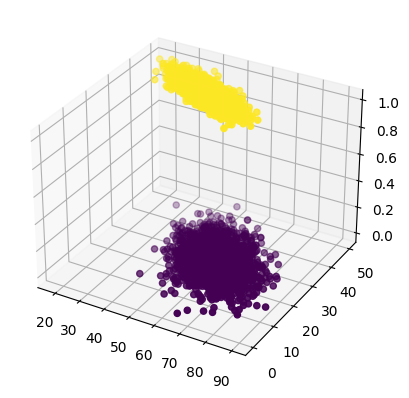

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["age"], df["physical_score"], df["test_result"], c=df["test_result"])

# Train | Test Split and Scaling

In [ ]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# help(LogisticRegression)

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix_manual(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


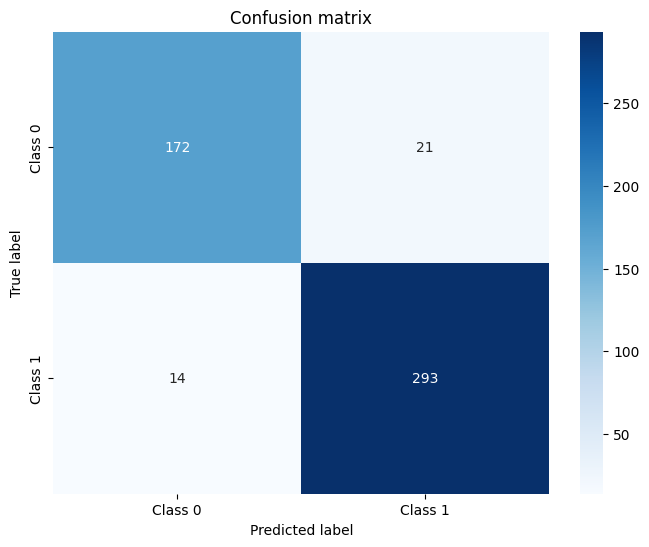

In [ ]:
y_true = y_test
# y_pred = [ ... ]  # Your predicted labels

cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix_manual(cm, classes=['Class 0', 'Class 1'])  # adjust 'classes' based on your data


In [ ]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [ ]:
y_train.iloc[0]

1

In [ ]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])